# Date and time data



```
df.loc[:, 'year'] = df['datetime_column'].dt.year
df.loc[:, 'weekofyear'] = df['datetime_column'].dt.isocalendar().week
df.loc[:, 'month'] = df['datetime_column'].dt.month
df.loc[:, 'dayofweek'] = df['datetime_column'].dt.dayofweek
df.loc[:, 'weekend'] = (df.datetime_column.dt.weekday >= 5).astype(int)
df.loc[:, 'hour'] = df['datetime_column'].dt.hour
```



In [1]:
import pandas as pd

# create a series of datetime with a frequency of 10 hours
s = pd.date_range('2022-04-15', '2022-04-25', freq='10H').to_series()

# create some features based on datetime
features = {
    'dayofweek': s.dt.dayofweek.values,
    'dayofyear': s.dt.dayofyear.values,
    'hour': s.dt.hour.values,
    'is_leap_year': s.dt.is_leap_year.values,
    'quarter': s.dt.quarter.values,
    'weekofyear': s.dt.isocalendar().week.values,
}

# Create features using aggregates
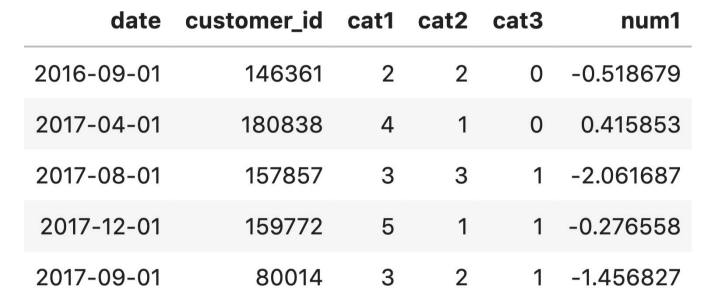



```
def generate_feature(df):
    # create a bunch of features using the date column
    df.loc[:, 'year'] = df['datetime_column'].dt.year
    df.loc[:, 'weekofyear'] = df['datetime_column'].dt.isocalendar().week
    df.loc[:, 'month'] = df['datetime_column'].dt.month
    df.loc[:, 'dayofweek'] = df['datetime_column'].dt.dayofweek
    df.loc[:, 'weekend'] = (
      df.datetime_column.dt.weekday >= 5
      ).astype(int)

    # create an aggregate dictionary
    aggs = {}

    # for aggregation by month, we calculate the
    # number of unique month values and also the mean
    aggs['month'] = ['nunique', 'mean']
    aggs['weekofyear'] = ['nunique', 'mean']

    # we aggregate by num1 and calculate sum, max, min
    # and mean values of this column
    aggs['num1'] = ['sum', 'max', 'min', 'mean']

    # for customer_id, we calculate the total count
    aggs['customer_id'] = ['size']

    # again for customer_id, we calculate the total unique
    aggs['customer_id'] = ['nunique']

    # we group by customer_id and calculate the aggregates
    agg_df = df.groupby('customer_id').agg(aggs)
    agg_df = agg_df.reset_index()

    return agg_df
```



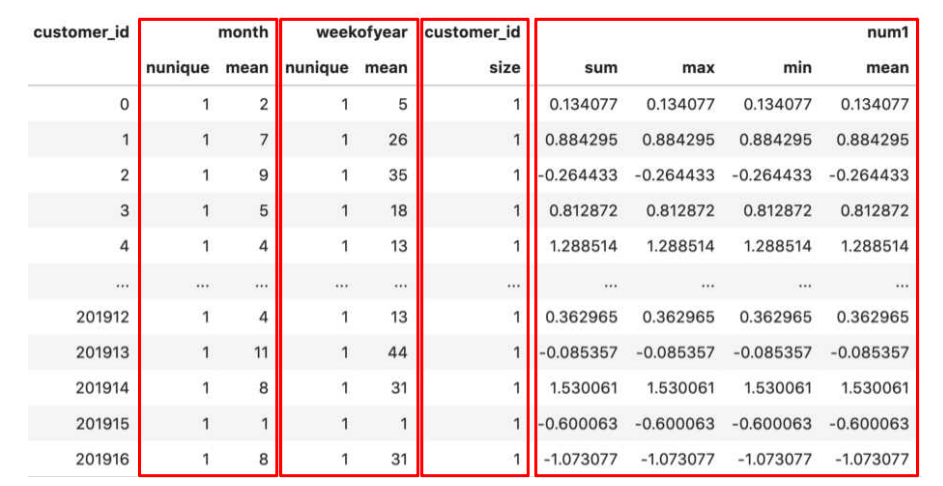

Now, we can join this dataframe with the original dataframe with customer_id column to start training a model. Here, we are not trying to predict anything; we are just creating generic features. However, it would have been easier to create features if we were trying to predict something here.

Sometimes, for example, when dealing with time-series problems, you might have features which are not individual values but a list of values. For example, transactions by a customer in a given period of time. In these cases, we create different types of features such as: with numerical features, when you are grouping on a categorical column, you will get features like a list of values which are time distributed. In these cases, you can create a bunch of statistical features such as:

- Mean
- Max
- Min
- Unique
- Skew
- Kurtosis
- Kstat
- Percentile
- Quantile
- Peak to peak
- And many more

These can be created using simple numpy functions.



```
import numpy as np

feature_dict = {}

# calculate mean
feature_dict['mean'] = np.mean(x)
# calculate max
feature_dict['max'] = np.max(x)
# calculate min
feature_dict['min'] = np.min(x)
# calculate standard deviation
feature_dict['std'] = np.std(x)
# calculate variance
feature_dict['var'] = np.var(x)
# peak-to-peak
feature_dict['ptp'] = np.ptp(x)
# percentile features
feature_dict['percentile_10'] = np.percentile(x, 10)
feature_dict['percentile_60'] = np.percentile(x, 60)
feature_dict['percentile_90'] = np.percentile(x, 90)
# quantile features
feature_dict['quantile_5'] = np.percentile(x, 5)
feature_dict['quantile_95'] = np.percentile(x, 95)
feature_dict['quantile_99'] = np.percentile(x, 99)
```

